In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import mglearn
import warnings

warnings.filterwarnings('ignore') 
plt.style.use('classic')

# 병합 군집
### 클러스터가 지정한 개수가 될 때까지 가장 거리가 가까운 클러스터 2개를 합한다.

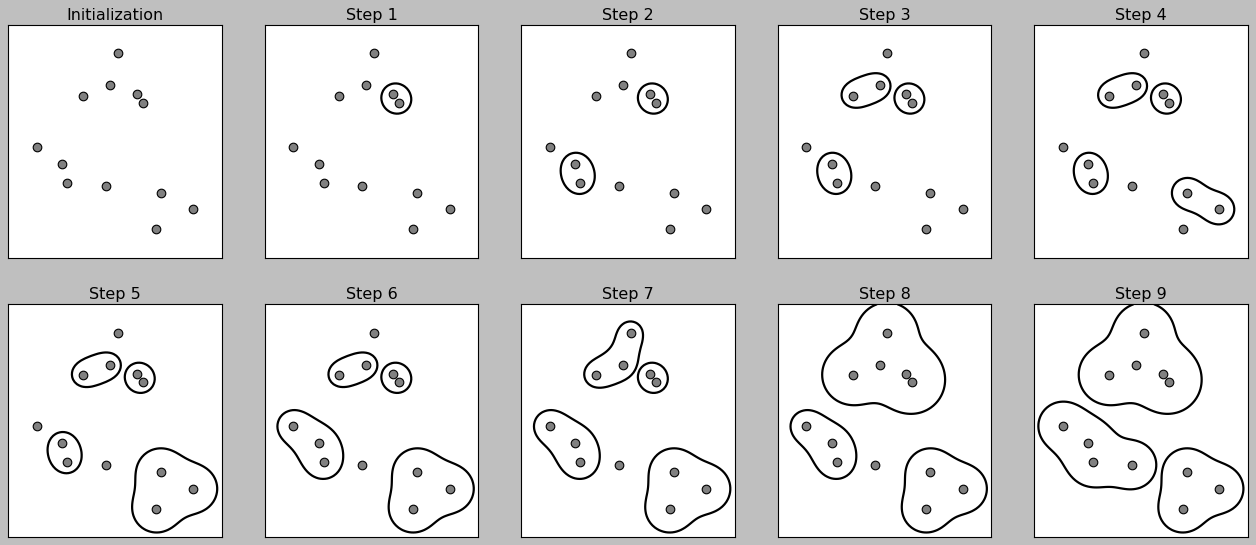

In [2]:
mglearn.plots.plot_agglomerative_algorithm()

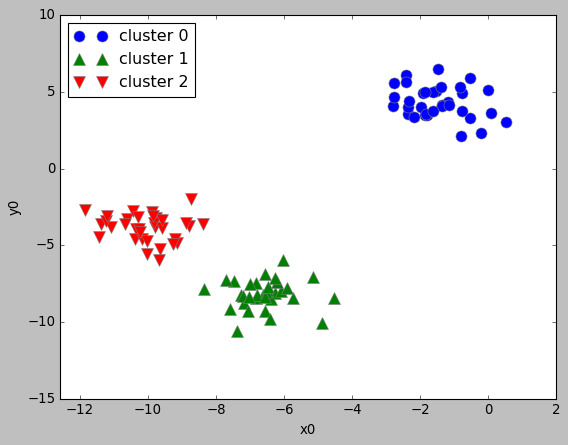

In [3]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
X,y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:,0], X[:,1], assignment)
plt.legend(['cluster 0', 'cluster 1', 'cluster 2'], loc='best')
plt.xlabel("x0")
plt.ylabel('y0')
plt.show()

# 계층적 군집과 덴드로그램
### 병합군집은 계층적 군집을 만들고 이를 덴드로그램으로 시각화할 수 있다.

Text(0, 0.5, 'distance between cluster')

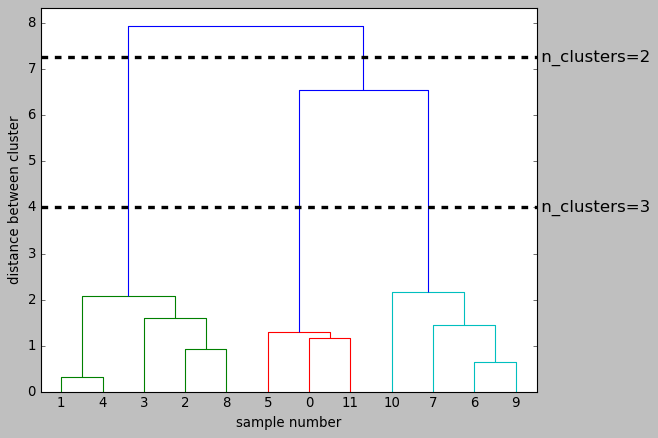

In [29]:
from scipy.cluster.hierarchy import dendrogram, ward
X,y = make_blobs(random_state=0, n_samples=12)

# 병합군집을 실행할 때 생성된 거리 정보가 담긴 배열
linkage_array = ward(X)

dendrogram(linkage_array)

# dendrogram 의 plt를 받아온다.
ax = plt.gca()
bounds = ax.get_xbound()
ax.hlines(xmin=bounds[0], xmax=bounds[1], y=7.25, ls='--',lw=3, colors='k')
ax.hlines(xmin=bounds[0], xmax=bounds[1], y=4, ls='--',lw=3, colors='k')

ax.text(bounds[1], 7.25, " n_clusters=2",fontdict={'size':15}, va='center')
ax.text(bounds[1], 4, " n_clusters=3",fontdict={'size':15}, va='center')

plt.xlabel("sample number")
plt.ylabel("distance between cluster") 
# 클러스터가 3개에서 2개로 줄일 때 거리가 급격히 증가하는 것을 보아 3개가 클러스터 3개가 적절하다는 것을 알 수 있다.

In [30]:
linkage_array

array([[ 1.        ,  4.        ,  0.3320945 ,  2.        ],
       [ 6.        ,  9.        ,  0.64580193,  2.        ],
       [ 2.        ,  8.        ,  0.92683223,  2.        ],
       [ 0.        , 11.        ,  1.1803787 ,  2.        ],
       [ 5.        , 15.        ,  1.30311575,  3.        ],
       [ 7.        , 13.        ,  1.4440339 ,  3.        ],
       [ 3.        , 14.        ,  1.60041812,  3.        ],
       [12.        , 18.        ,  2.07815795,  5.        ],
       [10.        , 17.        ,  2.15981886,  4.        ],
       [16.        , 20.        ,  6.55024854,  7.        ],
       [19.        , 21.        ,  7.92446877, 12.        ]])

# DBSCAN (density-based spatial clustering of applications with noise)
### min_samples : 줄일수록 샘플이 덜 조밀하게 존재하는 구역도 같은 클러스터로 묶인다.
### eps : 늘릴수록 공통된 클러스터로 묶인다.
## 특징 : 
### 묶이지 않은 클러스터를 잡음 클러스터로 분류한다.
### 클러스터의 개수를 미리 정할 필요가 없다.
### eps 거리 안에 min_samples 개수 만큼 샘플이 있다면 같은 클러스터로 묶는다.
### 하나의 클러스터에서 뻗어나가면서 클러스터를 묶기 때문에 다양한 클러스터 모양을 만들 수 있다.

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


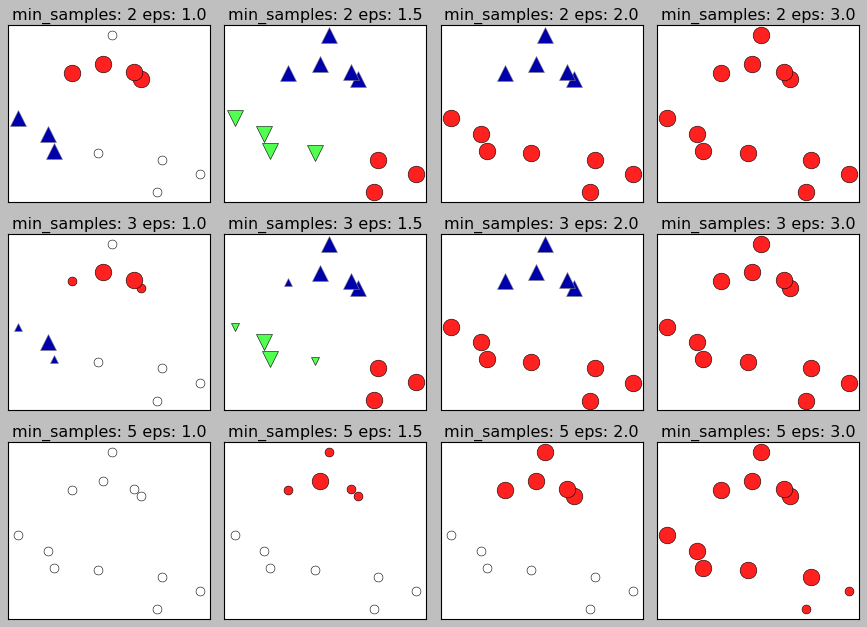

In [31]:
mglearn.plots.plot_dbscan()

Text(0, 0.5, 'x1')

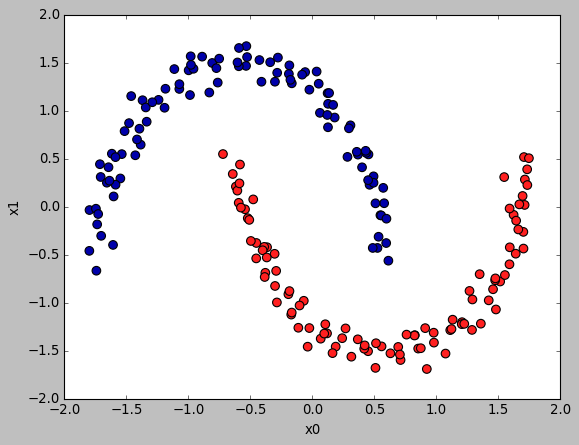

In [33]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
X,y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.xlabel('x0')
plt.ylabel('x1')
